# Visão Computacional 

# Autoencoder linear

## Importação das bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/mnist/

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
28 * 28

784

In [ ]:
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [ ]:
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

In [ ]:
X_treinamento[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_treinamento[0]

5

## Visualização das imagens

In [ ]:
np.random.randint(0, 60000)

45318

2


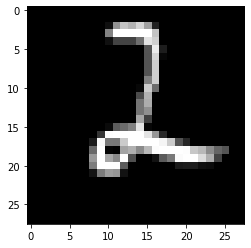

In [ ]:
i = np.random.randint(0, 60000)
print(y_treinamento[i])
plt.imshow(X_treinamento[i], cmap='gray');

In [ ]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

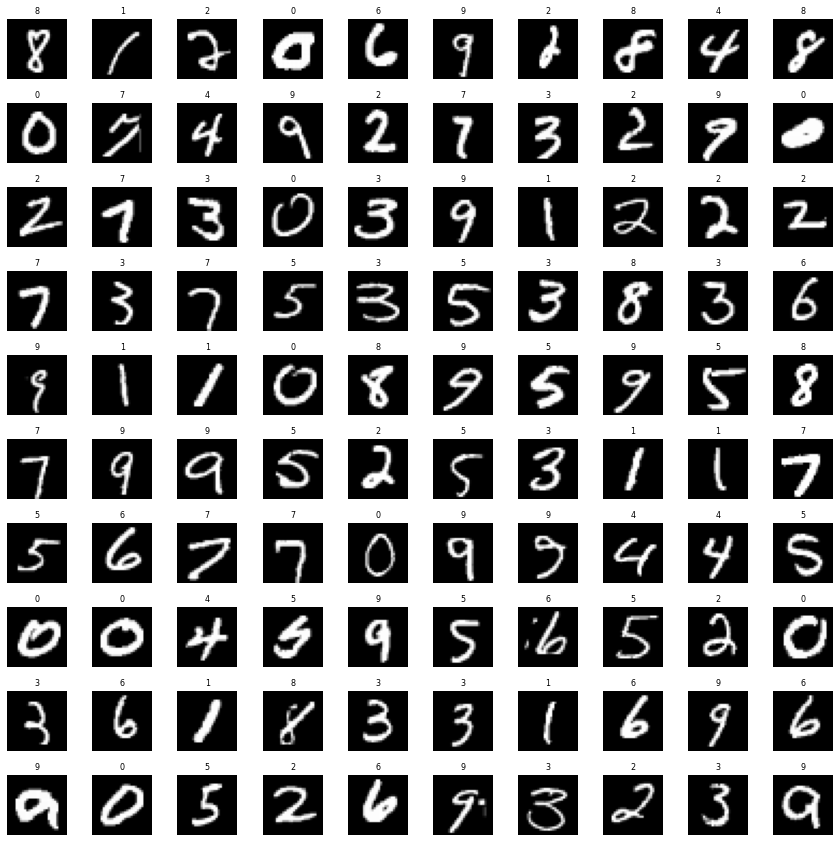

In [ ]:
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(15,15))
#print(axes.shape)
axes = axes.ravel() # (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, 100):
  indice = np.random.randint(0, 60000)
  axes[i].imshow(X_treinamento[indice], cmap='gray')
  axes[i].set_title(y_treinamento[indice], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [ ]:
X_treinamento[0].min(), X_treinamento[0].max()

(0, 255)

In [ ]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [ ]:
X_treinamento[0].min(), X_treinamento[0].max()

(0.0, 1.0)

In [ ]:
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
28 * 28

784

In [ ]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], X_treinamento.shape[1] * X_treinamento.shape[2])
X_treinamento.shape

(60000, 784)

In [ ]:
X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2])
X_teste.shape

(10000, 784)

## Construção e treinamento do autoencoder linear

In [ ]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

autoencoder = Sequential()

# Codificação
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Imagem codificada

# Decodificação
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1517 - accuracy: 0.0105
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1100 - accuracy: 0.0110
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1010 - accuracy: 0.0126
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0964 - accuracy: 0.0132
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0937 - accuracy: 0.0142
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0918 - accuracy: 0.0148
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0906 - accuracy: 0.0152
Epoch 8/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0896 - accuracy: 0.0137
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0889 - accuracy: 0.0146
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

## Codificação das imagens

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [ ]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


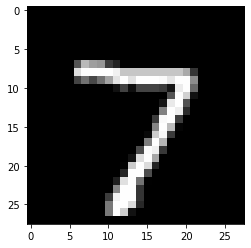

In [ ]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray');

In [ ]:
X_teste[0].shape

(784,)

In [ ]:
X_teste[0].reshape(1, -1).shape

(1, 784)

In [ ]:
imagem_codificada = encoder.predict(X_teste[0].reshape(1, -1))

In [ ]:
imagem_codificada

array([[0.        , 4.4441366 , 0.        , 7.176552  , 0.        ,
        2.3503447 , 4.748729  , 3.4026065 , 3.2540348 , 1.9592416 ,
        2.4664898 , 4.1533337 , 4.9922037 , 0.        , 2.1642735 ,
        0.        , 2.462111  , 0.        , 8.230658  , 5.1027822 ,
        9.075132  , 2.4236085 , 2.8707716 , 0.        , 3.86059   ,
        5.398787  , 2.0366387 , 2.015863  , 2.0849564 , 0.        ,
        4.6270814 , 0.99386305]], dtype=float32)

In [ ]:
imagem_codificada.shape

(1, 32)

In [ ]:
8 * 4

32

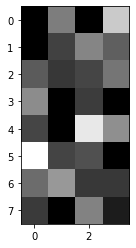

In [ ]:
plt.imshow(imagem_codificada.reshape(8,4), cmap='gray');

## Decodificação das imagens

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [ ]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
imagem_decodificada = decoder.predict(imagem_codificada)

In [ ]:
imagem_decodificada.shape

(1, 784)

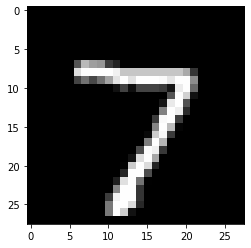

In [ ]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray');

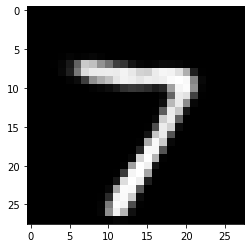

In [ ]:
plt.imshow(imagem_decodificada.reshape(28,28), cmap='gray');

## Codificação e decodificação das imagens de teste

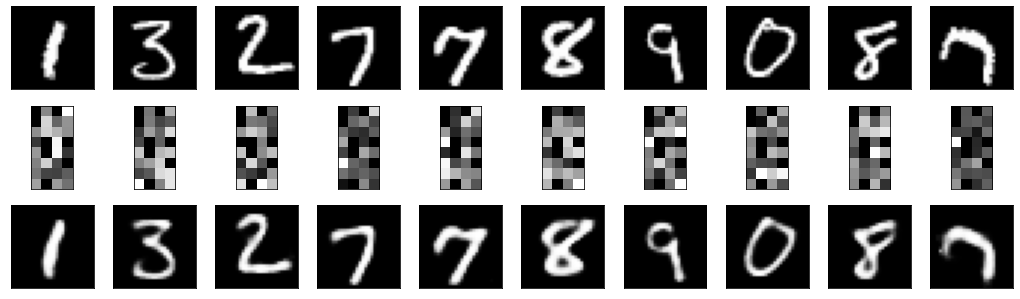

In [ ]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
#print(imagens_teste)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  #print(i, imagem_indice)
  
  # Imagens originais
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  ax = plt.subplot(10,10, i + 1 + numero_imagens)
  imagem_codificada = encoder.predict(X_teste[imagem_indice].reshape(1,-1))
  plt.imshow(imagem_codificada.reshape(8,4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens decodificadas
  ax = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(decoder.predict(imagem_codificada).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

# Autoencoder convolucional

## Importação das bibliotecas

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [ ]:
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

## Visualização das imagens

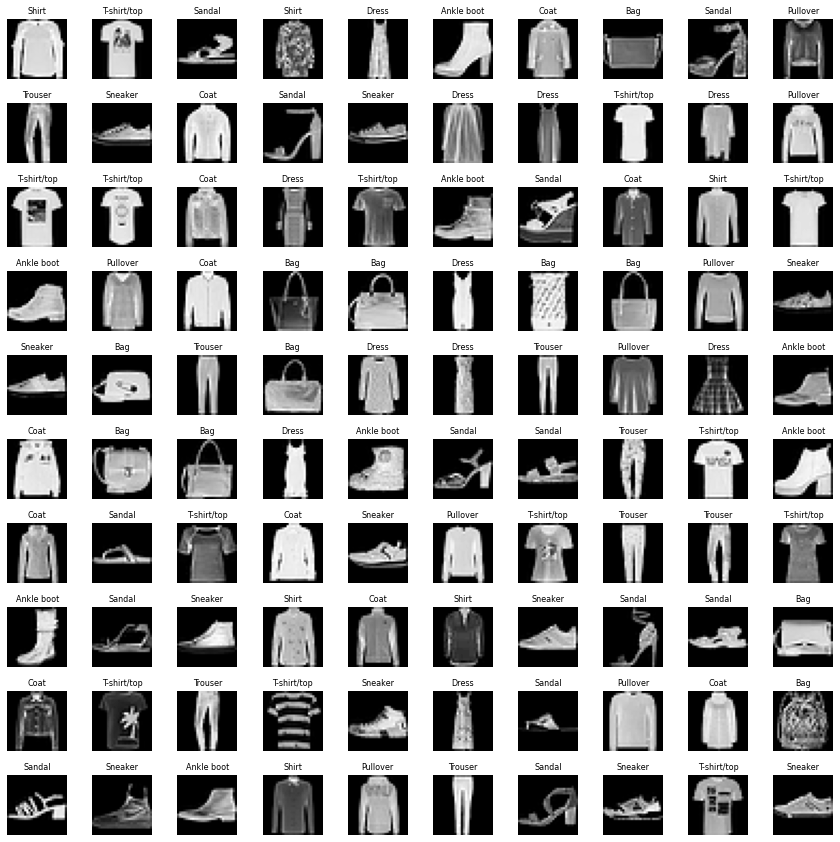

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
largura = 10
altura = 10
fig, axes = plt.subplots(altura, largura, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, largura * altura):
    indice = np.random.randint(0, 60000)
    axes[i].imshow(X_treinamento[indice], cmap = 'gray' )
    axes[i].set_title(classes[y_treinamento[indice]], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [ ]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [ ]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), 28, 28, 1))
X_teste = X_teste.reshape((len(X_teste), 28, 28, 1))

In [ ]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Construção e treinamento do autoencoder convolucional

In [ ]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)           0

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output = (28 - 3 + 1) / 1 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output = (16 - 3 + 1) / 1 -> (14, 14, 16)

In [ ]:
(16 - 3 + 1) / 1

14.0

In [ ]:
(28 - 3 + 1) / 1

26.0

In [ ]:
4 * 4 * 8

128

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3533 - accuracy: 0.5014
Epoch 2/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3338 - accuracy: 0.5020
Epoch 3/50
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3366 - accuracy: 0.5010
Epoch 4/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3210 - accuracy: 0.5024
Epoch 5/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3325 - accuracy: 0.5013
Epoch 6/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3173 - accuracy: 0.5026
Epoch 7/50
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3246 - accuracy: 0.5012
Epoch 8/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3240 - accuracy: 0.5021
Epoch 9/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3134 - accuracy: 0.5031
Epoch 10/50
1875/1875 [==============================] - 82s 44m

## Codificação e decodificação das imagens de teste

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)           0

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0     

In [ ]:
imagens_teste_codificadas = encoder.predict(X_teste)

In [ ]:
imagens_teste_codificadas.shape

(10000, 128)

In [ ]:
imagens_teste_codificadas[0]

array([0.12524891, 0.10064825, 0.        , 0.        , 0.0615008 ,
       0.        , 0.        , 0.10656793, 0.16941155, 0.15201361,
       0.        , 0.        , 0.01794172, 0.        , 0.        ,
       0.0298835 , 0.11525354, 0.15238345, 0.        , 0.        ,
       0.05522215, 0.        , 0.        , 0.        , 0.08934864,
       0.08275582, 0.        , 0.        , 0.1023128 , 0.        ,
       0.03582818, 0.00582939, 0.11510958, 0.080777  , 0.        ,
       0.03428068, 0.0885662 , 0.        , 0.        , 0.06575907,
       0.        , 0.4325869 , 0.18338141, 0.00697829, 0.2037906 ,
       0.        , 0.21261972, 0.        , 0.        , 0.4565801 ,
       0.        , 0.        , 0.        , 0.        , 0.55280674,
       0.27485785, 0.        , 0.01342809, 0.        , 0.        ,
       0.        , 0.05593295, 0.30946538, 0.14684963, 0.        ,
       0.37953186, 0.        , 0.        , 0.        , 0.        ,
       0.48850712, 0.4829868 , 0.        , 0.7343805 , 0.     

In [ ]:
imagens_teste_decodificadas = autoencoder.predict(X_teste)

In [ ]:
imagens_teste_decodificadas.shape

(10000, 28, 28, 1)

In [ ]:
16 * 8

128

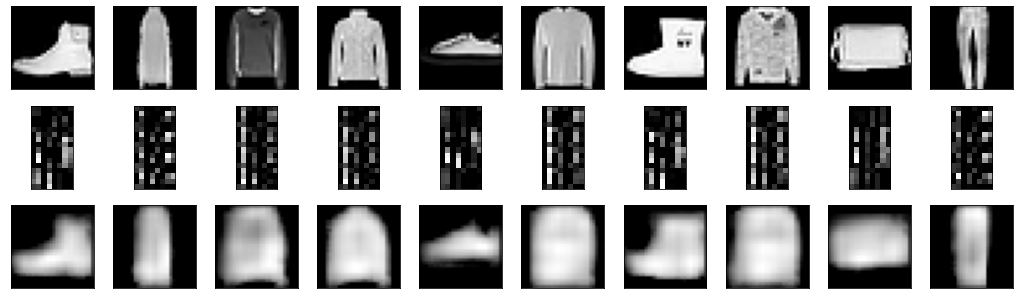

In [ ]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  # Imagem original
  ax = plt.subplot(10,10, i+1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  ax = plt.subplot(10,10, i+1+numero_imagens)
  plt.imshow(imagens_teste_codificadas[imagem_indice].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens decodificadas
  ax = plt.subplot(10,10, i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decodificadas[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())